<a href="https://colab.research.google.com/github/polarbeariceskating/KonsepData-AI/blob/main/Bootcamp_Keras_Syntax_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Syntax Basics

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explor data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

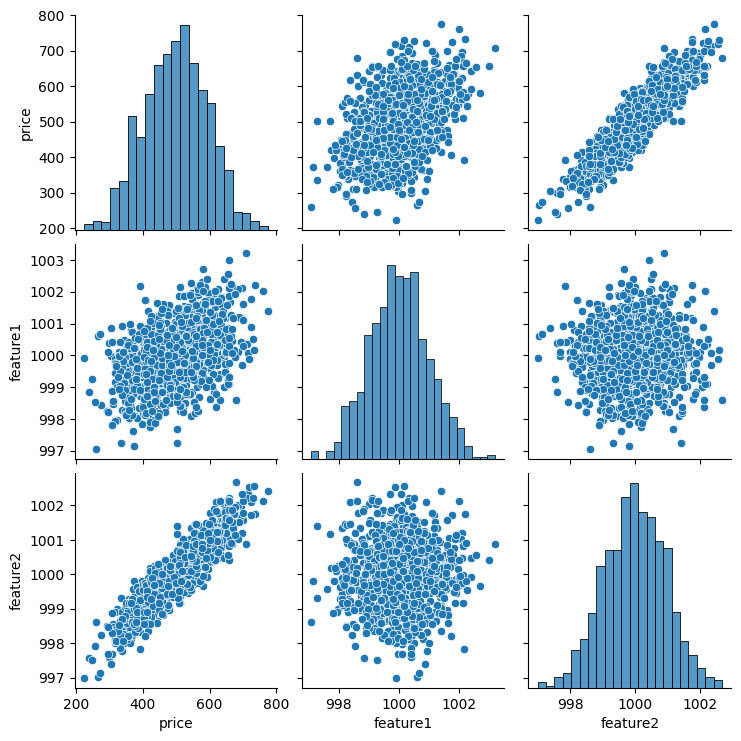

In [5]:
sns.pairplot(df)

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [14]:
scaler = MinMaxScaler()

In [58]:
# agar tidak terjadi kebocoran data dari set pengujian, dilakukan penyesuaian skala set pelatihan
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
help(Sequential)

Help on class Sequential in module keras.src.engine.sequential:

class Sequential(keras.src.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.

## Creating a Model


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [22]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [23]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [24]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

# Training


In [25]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256707.1719
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256665.0000
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256625.5469
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256580.2500
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256531.4219
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256479.5625
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256424.3125
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256365.3438
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 256302.1719
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 256234.6562
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 256161.8906
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

## Evaluation


In [26]:
model.history.history

{'loss': [256707.171875,
  256665.0,
  256625.546875,
  256580.25,
  256531.421875,
  256479.5625,
  256424.3125,
  256365.34375,
  256302.171875,
  256234.65625,
  256161.890625,
  256082.671875,
  255997.140625,
  255904.296875,
  255803.078125,
  255693.734375,
  255575.0,
  255447.34375,
  255308.453125,
  255158.71875,
  254997.234375,
  254823.40625,
  254635.890625,
  254434.453125,
  254218.828125,
  253986.125,
  253737.6875,
  253471.125,
  253186.0625,
  252882.71875,
  252558.90625,
  252213.234375,
  251846.03125,
  251456.1875,
  251042.40625,
  250600.3125,
  250134.171875,
  249642.328125,
  249120.53125,
  248569.546875,
  247989.828125,
  247377.328125,
  246732.359375,
  246054.484375,
  245337.921875,
  244586.1875,
  243800.75,
  242980.296875,
  242115.0,
  241208.234375,
  240265.171875,
  239278.609375,
  238244.015625,
  237165.125,
  236038.3125,
  234868.78125,
  233647.90625,
  232376.875,
  231057.25,
  229683.609375,
  228257.765625,
  226784.484375,
  225

In [27]:
loss = model.history.history['loss']

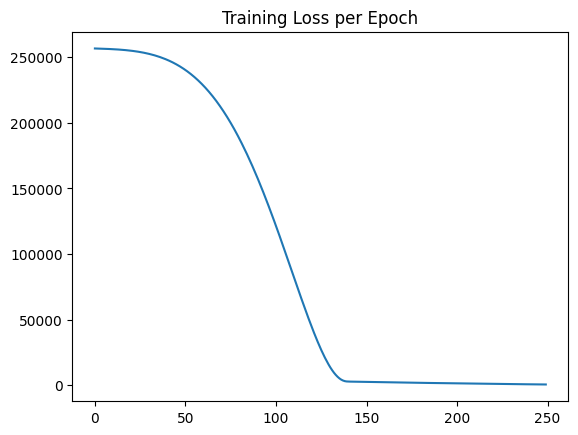

In [28]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.


In [29]:
model.metrics_names

['loss']

In [30]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [31]:
training_score

456.04400634765625

In [32]:
test_score

443.8629150390625

### Further Evaluations

In [33]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [34]:
test_predictions

array([[426.86353],
       [599.92566],
       [577.9282 ],
       [552.59894],
       [383.4989 ],
       [562.8559 ],
       [501.5558 ],
       [474.52237],
       [534.604  ],
       [466.34   ],
       [590.9181 ],
       [553.3563 ],
       [436.85153],
       [426.73633],
       [635.12244],
       [455.8199 ],
       [519.1719 ],
       [617.9299 ],
       [626.2298 ],
       [558.98706],
       [363.992  ],
       [457.43484],
       [404.00378],
       [406.38943],
       [553.8792 ],
       [583.00726],
       [525.763  ],
       [445.9569 ],
       [617.70825],
       [438.80893],
       [461.36743],
       [490.21936],
       [454.07953],
       [640.3991 ],
       [450.58716],
       [431.32437],
       [517.05676],
       [543.0341 ],
       [499.89722],
       [406.9266 ],
       [598.7929 ],
       [439.5589 ],
       [587.11005],
       [468.10233],
       [503.3028 ],
       [580.5766 ],
       [646.1743 ],
       [499.29825],
       [363.86392],
       [489.1973 ],


In [35]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [36]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [37]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [38]:
test_predictions

0      426.863525
1      599.925659
2      577.928223
3      552.598938
4      383.498901
          ...    
295    519.329346
296    493.391022
297    590.352844
298    442.082184
299    426.430237
Length: 300, dtype: float32

In [39]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [40]:
pred_df.columns = ['Test Y','Model Predictions']

In [41]:
pred_df

,Test Y,Model Predictions
0,402.296319,426.863525
1,624.156198,599.925659
2,582.455066,577.928223
3,578.588606,552.598938
4,371.224104,383.498901
...,...,...
295,525.704657,519.329346
296,502.909473,493.391022
297,612.727910,590.352844
298,417.569725,442.082184


<Axes: xlabel='Test Y', ylabel='Model Predictions'>

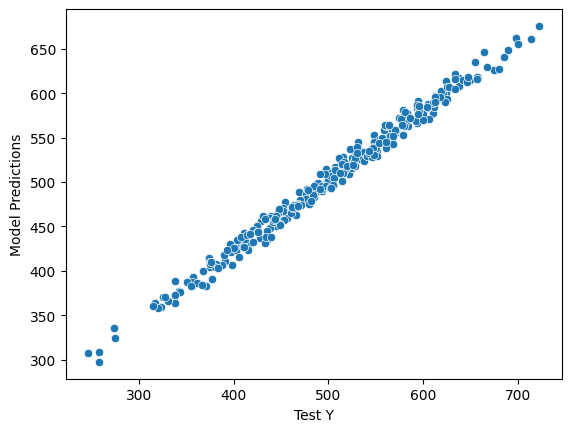

In [42]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [43]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

<Axes: xlabel='Error', ylabel='Count'>

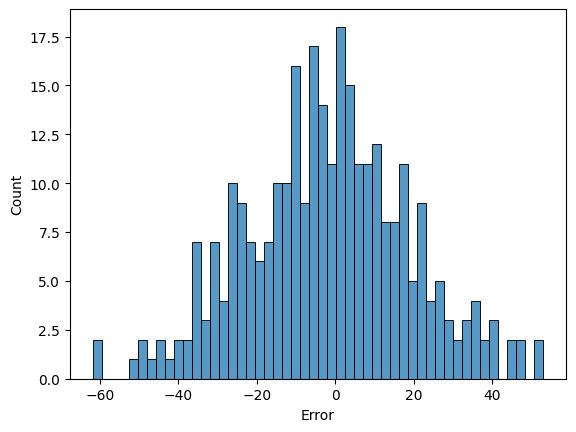

In [59]:
sns.histplot(pred_df['Error'],bins=50)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

16.608093390823953

In [47]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

443.86292763241624

In [60]:
# Pada dasarnya hal yang sama, perbedaannya hanya karena presisi.
test_score

443.8629150390625

In [49]:
#RMSE
test_score**0.5

21.068054372415656

# Predicting on brand new data


In [50]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [51]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [52]:
new_gem = scaler.transform(new_gem)

In [53]:
model.predict(new_gem)

1/1 [==============================] - 0s 25ms/step


array([[426.478]], dtype=float32)

## Saving and Loading a Model

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
later_model = load_model('my_model.h5')

In [57]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 68ms/step


array([[426.478]], dtype=float32)